# Tiff Parsing with BigEarthNet

## 2020년 09월 02일 안상호

[BigEarthNet](http://bigearth.net/)의 제공 코드를 통해서 데이터를 학습시켜본다

---

# Requirement

In [1]:
from pathlib import Path

# Sangho Workspace|
root_dir = Path("/home/jovyan/")
base_dir = root_dir  / 'Land-Cls'

data_path = base_dir / "data" 

In [2]:
import sys
import os

# Google Colab Version
# sys.path.append(str(base_dir))


# Local Version
PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd(), os.path.expanduser("__file__"))))
sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))

In [3]:
!ls ../data/bigearth/BigEarthNet-v1.0/S2A_MSIL2A_20170613T101031_0_45


S2A_MSIL2A_20170613T101031_0_45_B01.tif
S2A_MSIL2A_20170613T101031_0_45_B02.tif
S2A_MSIL2A_20170613T101031_0_45_B03.tif
S2A_MSIL2A_20170613T101031_0_45_B04.tif
S2A_MSIL2A_20170613T101031_0_45_B05.tif
S2A_MSIL2A_20170613T101031_0_45_B06.tif
S2A_MSIL2A_20170613T101031_0_45_B07.tif
S2A_MSIL2A_20170613T101031_0_45_B08.tif
S2A_MSIL2A_20170613T101031_0_45_B09.tif
S2A_MSIL2A_20170613T101031_0_45_B11.tif
S2A_MSIL2A_20170613T101031_0_45_B12.tif
S2A_MSIL2A_20170613T101031_0_45_B8A.tif
S2A_MSIL2A_20170613T101031_0_45_labels_metadata.json


## 패키지 설치 및 불러오기 

In [6]:
# !sudo apt-get install libgdal-dev
!conda install GDAL


failed

CondaError: KeyboardInterrupt



In [50]:
import tifffile as tiff
import pandas as pd

import json

import matplotlib.pyplot as plt
import numpy as np

# 1. BigEarthNet Metadata

> https://gitlab.tubit.tu-berlin.de/rsim/bigearthnet-tools

In [17]:
json_path = data_path / "bigearth" / "BigEarthNet-v1.0" / "S2A_MSIL2A_20170613T101031_0_45" / "S2A_MSIL2A_20170613T101031_0_45_labels_metadata.json"

In [20]:
with open(str(json_path), "r") as st_json:

    st_python = json.load(st_json)




In [28]:
import json

# with를 이용해 파일을 연다.
# json 파일은 같은 폴더에 있다고 가정!

with open(json_path) as json_file:
    json_data = json.load(json_file)
    
    


In [31]:
json_data.keys()


dict_keys(['labels', 'coordinates', 'projection', 'tile_source', 'acquisition_date'])

In [32]:
json_data["tile_source"]

'S2A_MSIL1C_20170613T101031_N0205_R022_T34VER_20170613T101025.SAFE'

In [16]:
pd.read_csv(data_path / "patches_with_seasonal_snow.csv")#.iloc[1]

,S2B_MSIL2A_20170831T095029_27_76
0,S2B_MSIL2A_20170831T095029_27_85
1,S2B_MSIL2A_20170831T095029_29_75
2,S2B_MSIL2A_20170831T095029_30_75
3,S2B_MSIL2A_20170831T095029_30_78
4,S2B_MSIL2A_20170831T095029_31_76
...,...
61701,S2A_MSIL2A_20180228T101021_43_6
61702,S2A_MSIL2A_20180228T101021_43_8
61703,S2A_MSIL2A_20180228T101021_43_11
61704,S2A_MSIL2A_20180228T101021_43_13


In [11]:
pd.read_csv(data_path / "patches_with_cloud_and_shadow.csv")

,S2A_MSIL2A_20170717T113321_35_89
0,S2A_MSIL2A_20170717T113321_39_84
1,S2B_MSIL2A_20171112T114339_0_13
2,S2B_MSIL2A_20171112T114339_0_52
3,S2B_MSIL2A_20171112T114339_0_53
4,S2B_MSIL2A_20171112T114339_0_54
...,...
9274,S2B_MSIL2A_20180204T94161_73_13
9275,S2B_MSIL2A_20180204T94161_74_6
9276,S2B_MSIL2A_20180204T94161_76_5
9277,S2B_MSIL2A_20180204T94161_76_6


# 2. BigEarthNet Tiff

S2A_MSIL2A_20170613T101031_0_45_B02.tif

> https://gitlab.tubit.tu-berlin.de/rsim/bigearthnet-models

In [78]:
files = os.listdir(data_path / "bigearth" / "BigEarthNet-v1.0")
len(files)

590326

In [39]:
!ls ../data/bigearth/BigEarthNet-v1.0/S2A_MSIL2A_20170613T101031_0_57
!pip3 install matplotlib

S2A_MSIL2A_20170613T101031_0_57_B01.tif
S2A_MSIL2A_20170613T101031_0_57_B02.tif
S2A_MSIL2A_20170613T101031_0_57_B03.tif
S2A_MSIL2A_20170613T101031_0_57_B04.tif
S2A_MSIL2A_20170613T101031_0_57_B05.tif
S2A_MSIL2A_20170613T101031_0_57_B06.tif
S2A_MSIL2A_20170613T101031_0_57_B07.tif
S2A_MSIL2A_20170613T101031_0_57_B08.tif
S2A_MSIL2A_20170613T101031_0_57_B09.tif
S2A_MSIL2A_20170613T101031_0_57_B11.tif
S2A_MSIL2A_20170613T101031_0_57_B12.tif
S2A_MSIL2A_20170613T101031_0_57_B8A.tif
S2A_MSIL2A_20170613T101031_0_57_labels_metadata.json


In [98]:
import matplotlib.pyplot as plt
import tifffile as tiff
import numpy as np

def merge_rgb(red, green, blue):
    return np.dstack((red,green,blue))


# For BigEarthNet

def read_json(json_path):
    with open(json_path) as json_file:
        return json.load(json_file)
    



['Permanently irrigated land', 'Rice fields', 'Pastures', 'Water courses']

'S2A_MSIL2A_20180526T100031_67_31'

['Non-irrigated arable land', 'Pastures', 'Mixed forest', 'Peatbogs']


(<Figure size 988.8x604.8 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f799abc7490>)

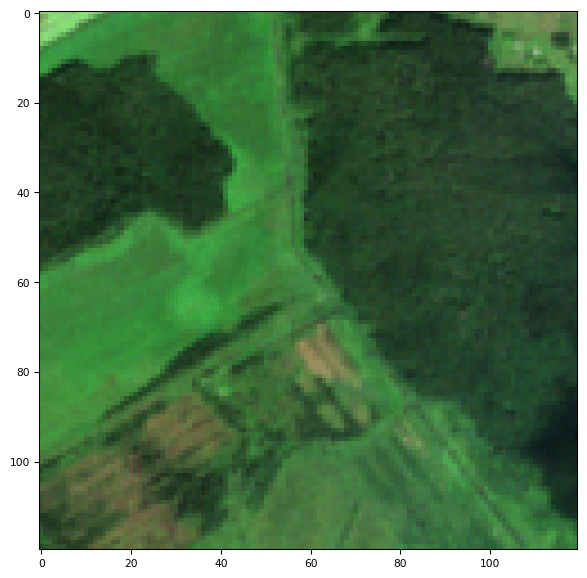

In [106]:
im_name = files[400340]

im_red = tiff.imread(data_path / "bigearth" / "BigEarthNet-v1.0" / f"{im_name}" / f"{im_name}_B04.tif") #.transpose([1, 2, 0])
im_green = tiff.imread(data_path / "bigearth" / "BigEarthNet-v1.0" / f"{im_name}" / f"{im_name}_B03.tif") #.transpose([1, 2, 0])
im_blue = tiff.imread(data_path / "bigearth" / "BigEarthNet-v1.0" / f"{im_name}" / f"{im_name}_B02.tif")

labels = read_json(data_path / "bigearth" / "BigEarthNet-v1.0" / f"{im_name}" / f"{im_name}_labels_metadata.json")["labels"]

print(labels)
tiff.imshow(merge_rgb(im_red, im_green, im_blue))

(<Figure size 988.8x604.8 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f799afd6890>)

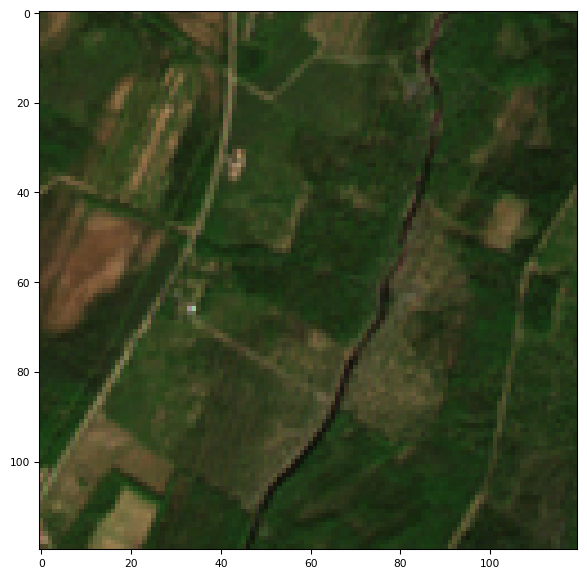

In [74]:
np.dstack((
    im_red.reshape([1, 120, 120]),
    im_green.reshape([1, 120, 120])  
))


(1, 120, 240)

(<Figure size 988.8x604.8 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f799e79d150>)

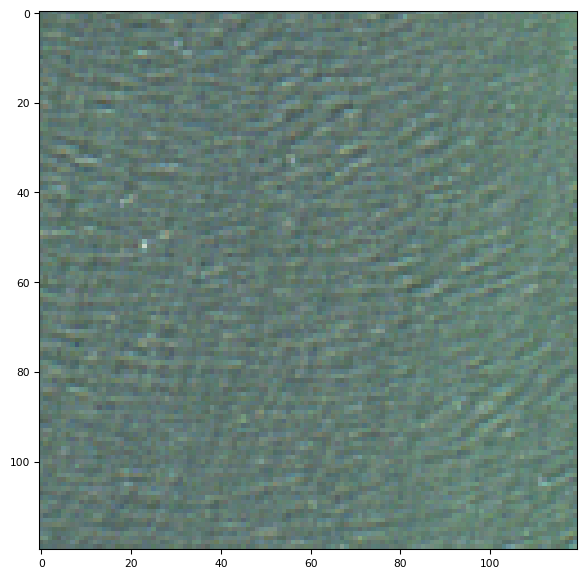

In [77]:
im_rgb = np.dstack((im_red,im_green,im_blue))

tiff.imshow(im_rgb)

In [56]:
# tiff.imshow(im_rgb)
# im_rgb
im_width, im_height = im_red.shape

array = np.zeros([3, im_width, im_height], dtype=np.uint8)


(120, 240)